In [10]:
import json
import numpy as np
from matplotlib import pyplot as plt 
from glob import glob
import re

In [30]:
# files = glob("checkpoints/*/metrics_epoch_*.json")
files = glob("/Users/Elias/miso_research/test/checkpoints/overfit_decomp_transformer.ckpt/metrics_epoch_*.json")
data = {}

for file in files:
    epoch_num = int(re.match(".*epoch_(\d+)\.json", file).group(1))

    data[epoch_num] = {"ppl": 0.0,
                       "loss": 0.0,
                       "src_copy": 0.0,
                       "tgt_copy": 0.0,
                       "generate": 0.0,
                       "uas": 0.0,
                       "las": 0.0}
    with open(file) as f1:
        metrics = json.load(f1)
    for key in data[epoch_num].keys():
        metrics_key = f"training_{key}"
        data[epoch_num][key] = metrics[metrics_key]
print(len(data))

500


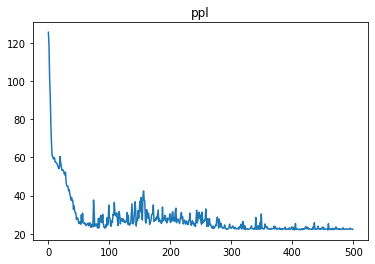

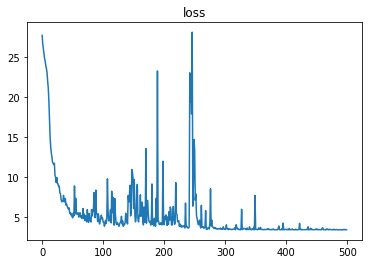

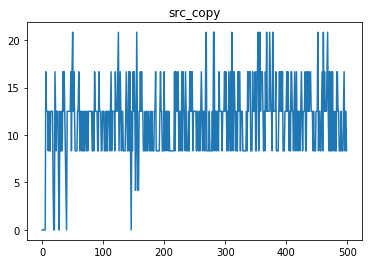

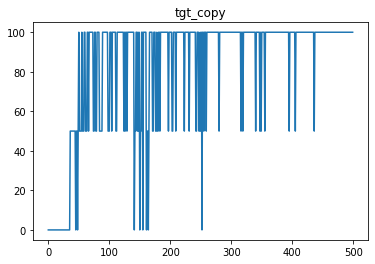

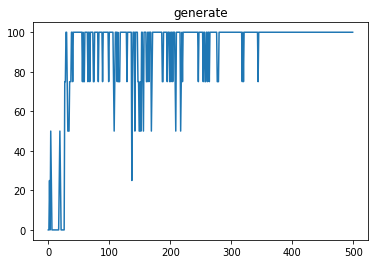

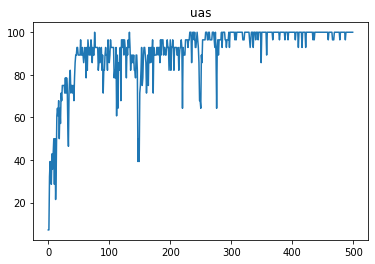

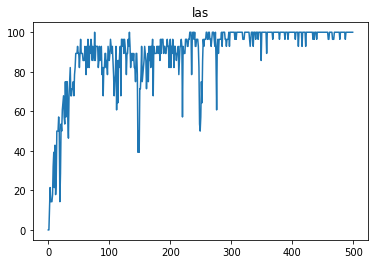

In [31]:
to_plot = {k:[] for k in data[0].keys()}
to_plot_x = []
for epoch, epoch_data in sorted(data.items(), key=lambda x: x[0]):
    for k in epoch_data.keys():
        to_plot[k].append(epoch_data[k])
    to_plot_x.append(epoch)

for metric_type, metric_data in to_plot.items():
    plt.figure()
    plt.plot(to_plot_x, metric_data)
    plt.title(metric_type)
    
    